### 240824 미니프로젝트 멀티모달 테스트 코드1: 전처리
- 데이터셋: 감정분류를 위한 음성 데이터셋
- 참고 코드: https://github.com/JoSamMoSa/ETRI_Text_Audio_Multimodal/blob/main/Preprocessing/Preprocessing.py

In [4]:
import pandas as pd

df = pd.read_csv('/content/5차년도_2차.csv', encoding='cp949')

In [5]:
df.columns

Index(['wav_id', '발화문', '상황', '1번 감정', '1번 감정세기', '2번 감정', '2번 감정세기', '3번 감정',
       '3번 감정세기', '4번 감정', '4번감정세기', '5번 감정', '5번 감정세기', '나이', '성별'],
      dtype='object')

In [6]:
df['상황'].unique()

array(['happiness', 'neutral', 'sadness', 'angry', 'surprise', 'disgust',
       'fear'], dtype=object)

In [7]:
df['5번 감정'].unique()

array(['happiness', 'neutral', 'sadness', 'angry', 'surprise', 'disgust',
       'fear'], dtype=object)

In [8]:
final_df = df[['wav_id', '발화문', '상황', '5번 감정']]

In [10]:
final_df.tail(30)

,wav_id,발화문,상황,5번 감정
19344,5fbe2fe5cb503578af9eed7b,여행지중에 추천할만한데 있어?,happiness,neutral
19345,5fbe3167576e9378b67ad4b2,혼자 있는데 너무 무서워.,fear,neutral
19346,5fbe2c7444697678c497c020,뉴스에 나올 정도로 많더라고. 아마 오늘 뉴스에 나올 거 같애.,neutral,neutral
19347,5fbe2c3244697678c497c01b,나 오늘 짭새가 몰려있길래 궁금해서 구경갔다왔어.,neutral,neutral
19348,5fbe2db6cb503578af9eed5e,와 짜장면에서 벌레나왔어.,disgust,neutral
19349,5fbe2dc8576e9378b67ad484,맞어. 엄청 큰 벌레여서 너무 싫었어.,disgust,sadness
19350,5fbe2a004c55eb78bd7cee0c,잘은 모르겠는데 사람들이 뭔 일 있었나봐?,neutral,neutral
19351,5fbe2e5acb503578af9eed69,너무 놀라가지고 사진도 못찍었어.,disgust,neutral
19352,5fbe3656cb503578af9eedb4,방향제도 뿌려봤는데 냄새만 더 이상해졌어.,disgust,sadness
19353,5fbe29ed4c55eb78bd7cee0a,앞에 경찰들이 완전 많이 있더라고.,neutral,neutral


In [14]:
# 2000개를 넘지 않는 감정 label 제거
final_df = final_df[~final_df['5번 감정'].isin(['surprise', 'disgust', 'fear'])]
final_df

,wav_id,발화문,상황,5번 감정
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,happiness
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,happiness
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,happiness
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness,happiness
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral,happiness
...,...,...,...,...
19369,5fbe313c44697678c497c05a,나 엘리베이터에 갇혔어.,fear,sadness
19370,5fbe251044697678c497bfb8,하지만 기분이 나쁜 걸 어떡해?,angry,neutral
19371,5fbe31584c55eb78bd7cee7f,자취방 엘리베이턴데 정전인가봐.,fear,sadness
19372,5fbe2f8544697678c497c047,나 드디어 프로젝트 끝났어!,happiness,sadness


In [16]:
final_df['5번 감정'].unique()

array(['happiness', 'neutral', 'sadness', 'angry'], dtype=object)

In [17]:
# 감정 레이블과 숫자 매핑
emo_mapping = {
    'neutral': 0,
    'happiness': 1,
    'sadness': 2,
    'angry': 3,
}

# 'label' 열 생성
final_df['label'] = final_df['5번 감정'].map(emo_mapping)

# 결과 확인
final_df[['5번 감정', 'label']]

,5번 감정,label
0,happiness,1
1,happiness,1
2,happiness,1
3,happiness,1
4,happiness,1
...,...,...
19369,sadness,2
19370,neutral,0
19371,sadness,2
19372,sadness,2


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


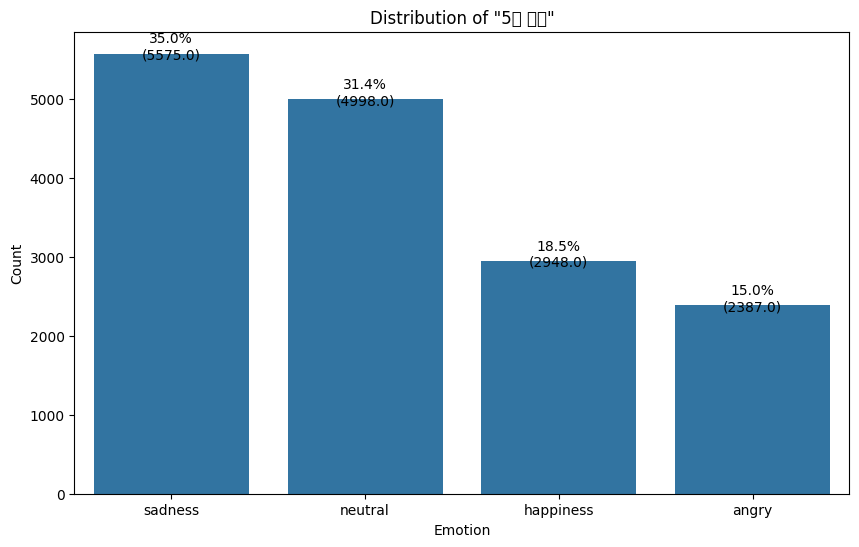

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# '5번 감정' 분포 계산
emotion_counts = final_df['5번 감정'].value_counts()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='5번 감정', data=final_df, order=emotion_counts.index)
plt.title('Distribution of "5번 감정"')
plt.xlabel('Emotion')
plt.ylabel('Count')

# 값 위에 비율과 개수 표시
total = len(final_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    count = p.get_height()
    ax.annotate(f'{percentage}\n({count})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [21]:
final_df.rename(columns = {'발화문':'text', '상황':'situation', '5번 감정':'emotion'}, inplace=True)
final_df

,wav_id,text,situation,emotion,label
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,happiness,1
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,happiness,1
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,happiness,1
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness,happiness,1
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral,happiness,1
...,...,...,...,...,...
19369,5fbe313c44697678c497c05a,나 엘리베이터에 갇혔어.,fear,sadness,2
19370,5fbe251044697678c497bfb8,하지만 기분이 나쁜 걸 어떡해?,angry,neutral,0
19371,5fbe31584c55eb78bd7cee7f,자취방 엘리베이턴데 정전인가봐.,fear,sadness,2
19372,5fbe2f8544697678c497c047,나 드디어 프로젝트 끝났어!,happiness,sadness,2


In [22]:
final_df.to_csv('/content/df_4emotions', mode='w', encoding="utf-8-sig")